In [1]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

In [3]:
pip install matplotlib

In [4]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Samil\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [18]:
raw_dataset=pd.read_csv("Doublet_EAF_35.csv",sep=",")

In [19]:
 Doublet_EAF_35= raw_dataset.copy()
Doublet_EAF_35.head()

,Date,Longitude,Latitude,Depth,Magnitude
0,08/01/2024 13:19:12,38.7525,38.2842,8.97,4.4
1,07/01/2024 15:58:00,37.2725,38.3222,6.99,3.9
2,06/01/2024 12:10:09,38.5897,38.1694,8.76,4.0
3,05/01/2024 14:03:03,37.4519,38.3753,6.99,3.6
4,30/12/2023 13:26:24,39.0192,38.4564,9.36,4.2


In [20]:
Doublet_EAF_35.shape

(1821, 5)

In [27]:
x = Doublet_EAF_35.iloc[:,1].values
y = Doublet_EAF_35.iloc[:,2].values
z = Doublet_EAF_35.iloc[:,3].values
colors = Doublet_EAF_35.iloc[:,4].values
sizes = Doublet_EAF_35.iloc[:,4].values*25

In [28]:
import plotly.graph_objects as go

# Obtain high-resolution world map data online
fig = go.Figure(go.Choroplethmapbox(
    geojson="https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json",
    locations=["USA", "CAN", "MEX", "RUS", "CHN"],  # Example country codes (USA, Canada, Mexico, Russia, China)
    z=[1, 1, 1, 1, 1],  # Values to be assigned to countries (all set to 1)
    colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    zmin=3,
    zmax=8,
    marker_opacity=0.9,  # Opacity of country borders
    marker_line_width=1,  # Thickness of country borders
))

# Create sample earthquake data
earthquake_data = {
    'Longitude': x,
    'Latitude': y,
    'Magnitude': colors,
}

# Add earthquake data with Scatter plot
fig.add_trace(go.Scattermapbox(
    lat=earthquake_data['Latitude'],
    lon=earthquake_data['Longitude'],
    mode='markers',
    marker=dict(
        size=earthquake_data['Magnitude'] * 2,  # Set point sizes based on Magnitude value
        color=earthquake_data['Magnitude'],  # Set color scale based on Magnitude value
        colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    ),
))

# Specify map layout and style
fig.update_layout(
    mapbox_style="open-street-map",  # Set map style (for other styles: "open-street-map", "stamen-terrain", etc.)
    mapbox_zoom=6,  # Set map zoom level
    mapbox_center={"lat": 37.000, "lon": 37.0000},  # Set map center (center of the USA)
)

# Increase resolution and font size
fig.update_layout(
    width=700,  # Set width to increase resolution
    height=630,  # Set height to increase resolution
    font=dict(
        size=20  # Set font size for English comments
    )
)

# Display the plot
fig.show()

In [29]:
x = Doublet_EAF_35.iloc[:,1].values
y = Doublet_EAF_35.iloc[:,2].values
z = Doublet_EAF_35.iloc[:,3].values
colors = Doublet_EAF_35.iloc[:,4].values
sizes = Doublet_EAF_35.iloc[:,4].values*15

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display



# İnteraktif işlev

def plot_3d_scatter(elev, azim, zoom, theta):
    fig = plt.figure(figsize=(12, 10)) 
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')
    cbar = plt.colorbar(ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet'))    
    cbar.set_label('Magnitude')  

    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Depth_km')  
    ax.dist = zoom  # Zoom ayarı
    ax.azim = theta  # Maus ile çevirme
    
    font=dict(
        size=30  # Set font size for English comments
    )
    plt.show()

# İnteraktif widget'ı oluşturma
elev_slider = widgets.IntSlider(min=0, max=180, value=30, description='Elevation:')
azim_slider = widgets.IntSlider(min=0, max=360, value=30, description='Azimuth:')
zoom_slider = widgets.FloatSlider(min=1, max=10, value=5, description='Zoom:')
theta_slider = widgets.IntSlider(min=0, max=360, value=30, description='Theta:')
interactive_plot = interactive(plot_3d_scatter, elev=elev_slider, azim=azim_slider, zoom=zoom_slider, theta=theta_slider)

# Widget'ı görüntüleme
display(interactive_plot)

interactive(children=(IntSlider(value=30, description='Elevation:', max=180), IntSlider(value=30, description=…

In [25]:
x = Doublet_EAF_35.iloc[:,1].values
y = Doublet_EAF_35.iloc[:,2].values
z = Doublet_EAF_35.iloc[:,0].values
colors = Doublet_EAF_35.iloc[:,4].values
sizes = Doublet_EAF_35.iloc[:,4].values*7

In [26]:
z

array(['08/01/2024 13:19:12', '07/01/2024 15:58:00',
       '06/01/2024 12:10:09', ..., '06/02/2023 01:26:49',
       '06/02/2023 01:23:16', '06/02/2023 01:17:32'], dtype=object)

In [14]:
from datetime import datetime

# Zaman damgalarını içeren bir liste oluştur
timestamps = z

# Zaman damgalarını saniyeye dönüştür
seconds = [datetime.timestamp(datetime.strptime(timestamp, '%d/%m/%Y %H:%M:%S')) for timestamp in timestamps]

print(seconds) # Saniye cinsinden zaman damgalarını görüntüle

[1704709152.0, 1704632280.0, 1704532209.0, 1704452583.0, 1703931984.0, 1703891113.0, 1703745245.0, 1703652912.0, 1703544181.0, 1703500670.0, 1703386343.0, 1703172273.0, 1703006572.0, 1702868845.0, 1702582378.0, 1702416969.0, 1701678003.0, 1701379129.0, 1701124355.0, 1700993608.0, 1700744098.0, 1700740197.0, 1700739968.0, 1700454964.0, 1700430904.0, 1700315757.0, 1700078325.0, 1700076730.0, 1700049365.0, 1700003667.0, 1699486334.0, 1698672347.0, 1698595709.0, 1698298332.0, 1698097173.0, 1697924927.0, 1697785222.0, 1697783010.0, 1697779810.0, 1697570056.0, 1697540393.0, 1697473858.0, 1697446261.0, 1697355251.0, 1697311914.0, 1697274130.0, 1697256274.0, 1697251735.0, 1696822133.0, 1696724678.0, 1696705306.0, 1696661816.0, 1696508598.0, 1696395494.0, 1696312368.0, 1696307118.0, 1696236533.0, 1696196633.0, 1695946458.0, 1695946333.0, 1695871104.0, 1695866493.0, 1695701680.0, 1695695575.0, 1695636299.0, 1695446541.0, 1695305870.0, 1694786091.0, 1694208004.0, 1694019701.0, 1693820561.0, 16937

In [15]:
seconds 

[1704709152.0,
 1704632280.0,
 1704532209.0,
 1704452583.0,
 1703931984.0,
 1703891113.0,
 1703745245.0,
 1703652912.0,
 1703544181.0,
 1703500670.0,
 1703386343.0,
 1703172273.0,
 1703006572.0,
 1702868845.0,
 1702582378.0,
 1702416969.0,
 1701678003.0,
 1701379129.0,
 1701124355.0,
 1700993608.0,
 1700744098.0,
 1700740197.0,
 1700739968.0,
 1700454964.0,
 1700430904.0,
 1700315757.0,
 1700078325.0,
 1700076730.0,
 1700049365.0,
 1700003667.0,
 1699486334.0,
 1698672347.0,
 1698595709.0,
 1698298332.0,
 1698097173.0,
 1697924927.0,
 1697785222.0,
 1697783010.0,
 1697779810.0,
 1697570056.0,
 1697540393.0,
 1697473858.0,
 1697446261.0,
 1697355251.0,
 1697311914.0,
 1697274130.0,
 1697256274.0,
 1697251735.0,
 1696822133.0,
 1696724678.0,
 1696705306.0,
 1696661816.0,
 1696508598.0,
 1696395494.0,
 1696312368.0,
 1696307118.0,
 1696236533.0,
 1696196633.0,
 1695946458.0,
 1695946333.0,
 1695871104.0,
 1695866493.0,
 1695701680.0,
 1695695575.0,
 1695636299.0,
 1695446541.0,
 169530587

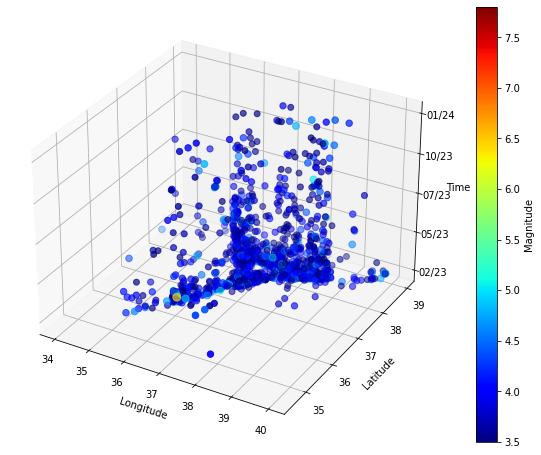

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from datetime import datetime

# Assuming Doublet_EAF_35F3 is a DataFrame with appropriate columns
x = Doublet_EAF_35.iloc[:, 1].values
y = Doublet_EAF_35.iloc[:, 2].values
z = seconds 
colors = Doublet_EAF_35.iloc[:, 4].values
sizes = Doublet_EAF_35.iloc[:, 4].values * 10

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Magnitude')

# Labeling axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')

# Formatting time ticks
# Assuming seconds is a list or array of time values
# Adjust the ticks and labels according to your data
time_ticks = np.linspace(min(seconds), max(seconds), 5)
time_labels = [datetime.fromtimestamp(t).strftime('%m/%y') for t in time_ticks]  # Format güncellendi
ax.set_zticks(time_ticks)
ax.set_zticklabels(time_labels)

# Adjust font size
plt.rc('font', size=15)

plt.show()